In [510]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
from matplotlib.ticker import FixedLocator

In [511]:
# gaussian in xy plane
def gaussian(x, y, x0, y0, sigma):
    return np.exp(-((x-x0)**2 + (y-y0)**2) / (2*sigma**2))

In [512]:
# fourier transform returns the amplitude and phase
def fourier_transform(f):
    F = fft.fftn(f, norm='backward')
    F = fft.fftshift(F)
    F_amp = np.abs(F)
    F_phase = np.arctan(np.imag(F)/np.real(F))
    return F_amp, F_phase

In [ ]:
# plot next to each other amplitude of function, amplitude of fourier transform and phase of fourier transform
def plot(f, F, X, Y):
    fig, axs = plt.subplots(1, 3, figsize=(18, 4.5))

    lw = 0.2

    x_lim = 0.3
    kx_lim = 200

    x_max = X.max()
    x_min = X.min()
    y_max = Y.max()
    y_min = Y.min()

    Nx = X.shape[1]
    Ny = X.shape[0]

    kx_max = np.pi / (x_max-x_min) * Ny
    kx_min = -kx_max
    ky_max = np.pi / (y_max-y_min) * Ny
    ky_min = -ky_max

    kx = np.linspace(kx_min, kx_max, Ny)
    ky = np.linspace(ky_min, ky_max, Ny)
    KX, KY = np.meshgrid(kx, ky)

    plot = axs[0].contourf(X, Y, f, 100, cmap='berlin', vmin=-np.max(np.abs(f)), vmax=np.max(np.abs(f)))
    axs[0].set_title('f(x,y)')
    axs[0].set_xlabel(r'$x (\mathrm{\AA})$', fontsize=11)
    axs[0].set_ylabel(r'$y (\mathrm{\AA})$', fontsize=11)
    # add a colorbar
    fig.colorbar(plot)
    # white lines for x and y axis
    axs[0].axhline(0, color='white', lw=lw)
    axs[0].axvline(0, color='white', lw=lw)
    axs[0].set_aspect('equal', 'box')
    if x_lim:
        axs[0].set_xlim(-x_lim, x_lim)
        axs[0].set_ylim(-x_lim, x_lim)

    plot = axs[1].contourf(KX, KY, F[0], 100, cmap='viridis')
    axs[1].set_title('abs(FFT(f))')
    axs[1].set_xlabel(r'$k_x (\mathrm{\AA}^{-1})$', fontsize=11)
    axs[1].set_ylabel(r'$k_y (\mathrm{\AA}^{-1})$', fontsize=11)
    # add a colorbar
    fig.colorbar(plot)
    # white lines for x and y axis
    axs[1].axhline(0, color='white', lw=lw)
    axs[1].axvline(0, color='white', lw=lw)
    axs[1].set_xlim
    axs[1].set_aspect('equal', 'box')
    if kx_lim:
        axs[1].set_xlim(-kx_lim, kx_lim)
        axs[1].set_ylim(-kx_lim, kx_lim)

    plot = axs[2].contourf(KX, KY, np.multiply(F[1], F[0]/np.max(F[0])), levels=np.linspace(-np.pi/2-1e-3, np.pi/2+1e-3, 101), cmap='coolwarm', vmin=-np.pi, vmax=np.pi)
    axs[2].set_title('arg(FFT(f)) * abs(FFT(f))/max(abs(FFT(f)))')
    axs[2].set_xlabel(r'$k_x (\mathrm{\AA}^{-1})$', fontsize=11)
    axs[2].set_ylabel(r'$k_y (\mathrm{\AA}^{-1})$', fontsize=11)
    # aspect ratio equal
    axs[2].set_aspect('equal')
    # add a colorbar
    cbar = fig.colorbar(plot)
    cbar.set_ticks([-np.pi/2, 0, np.pi/2])
    cbar.set_ticklabels([r'$-\pi/2$', r'$0$', r'$\pi/2$'])

    # cbar limits
    # cbar has no attribute set_clim !!!
    if kx_lim:
        axs[2].set_xlim(-kx_lim, kx_lim)
        axs[2].set_ylim(-kx_lim, kx_lim)
    plt.show()

In [514]:
# define a function to be transformed
N = 501
x = np.linspace(-1, 1, N, dtype=np.float64)
y = np.linspace(-1, 1, N, dtype=np.float64)

X, Y = np.meshgrid(x, y)

sigma = 0.03

## Centered
- no phase
- FFT(gaussian) = gaussian

- if there is a finite phase even for centered objects, increase the sampling of your real space

/tmp/ipykernel_1353791/3632906505.py:6: RuntimeWarning: invalid value encountered in divide
  F_phase = np.arctan(np.imag(F)/np.real(F))


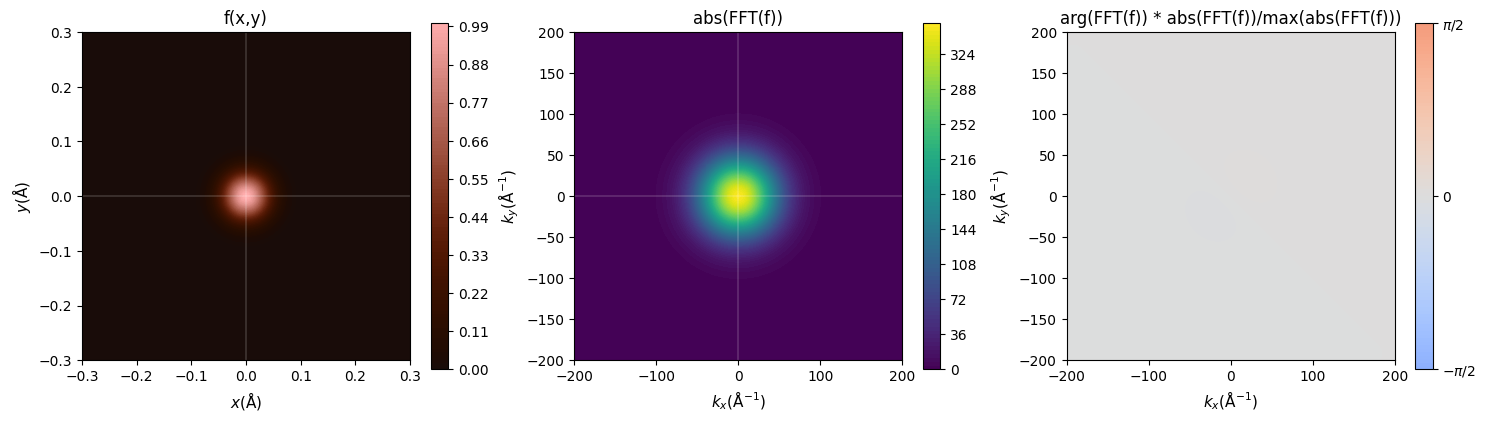

In [515]:
x0 = 0.0
y0 = 0.0

f = gaussian(X, Y, x0, y0, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

### Smaller is bigger

/tmp/ipykernel_1353791/3632906505.py:6: RuntimeWarning: invalid value encountered in divide
  F_phase = np.arctan(np.imag(F)/np.real(F))


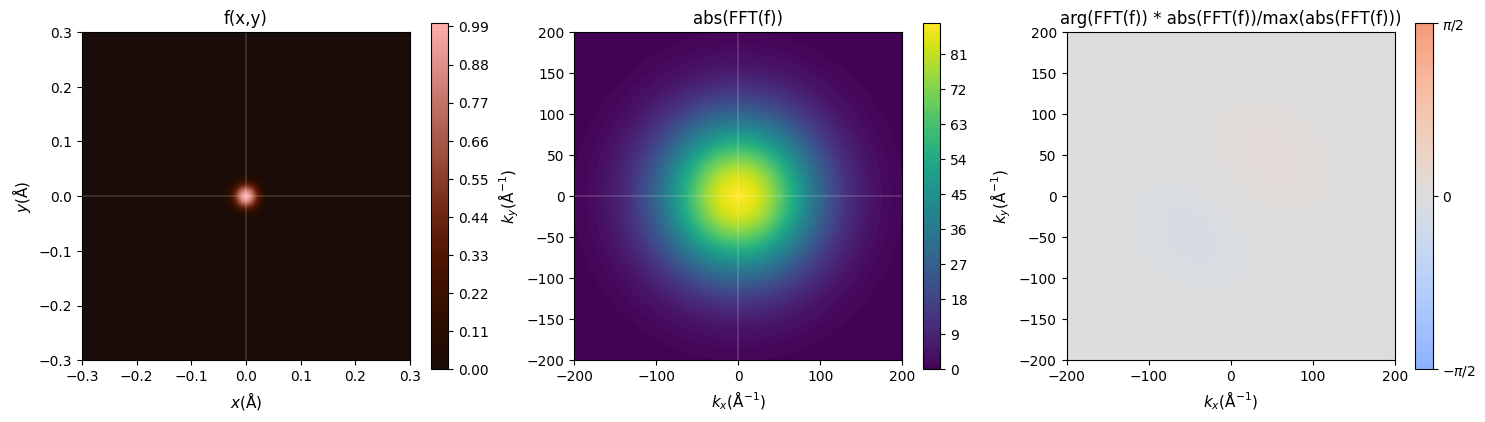

In [516]:
x0 = 0.0
y0 = 0.0

f = gaussian(X, Y, x0, y0, sigma=0.5*sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

## Off-center
- still centered at FFT, instead gain a phase as a plane wave

/tmp/ipykernel_1353791/3632906505.py:6: RuntimeWarning: invalid value encountered in divide
  F_phase = np.arctan(np.imag(F)/np.real(F))


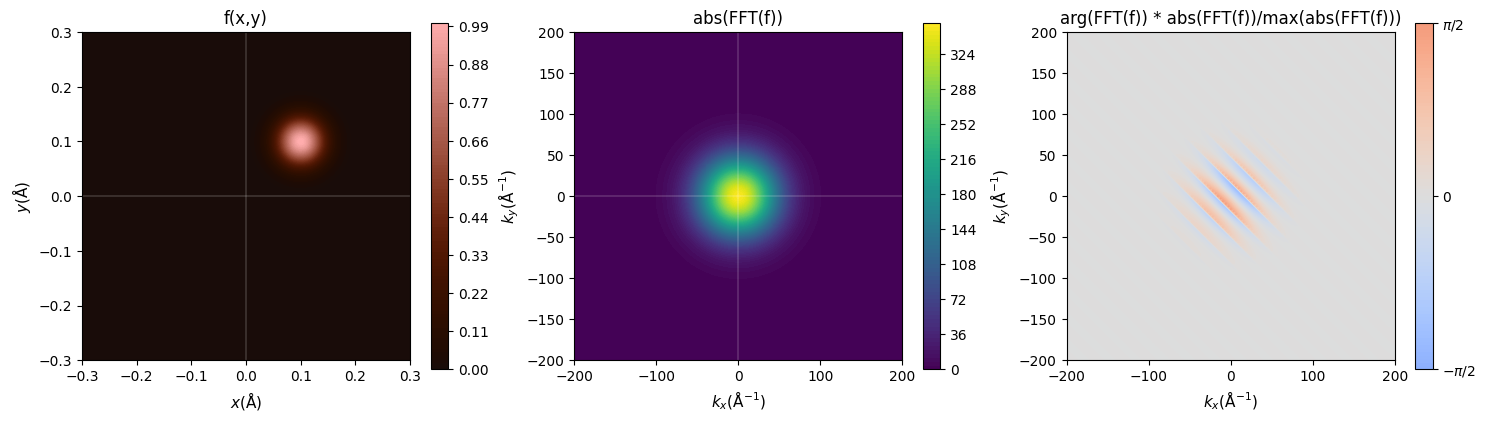

In [517]:
x0 = 0.1
y0 = 0.1

f = gaussian(X, Y, x0, y0, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

/tmp/ipykernel_1353791/3632906505.py:6: RuntimeWarning: invalid value encountered in divide
  F_phase = np.arctan(np.imag(F)/np.real(F))


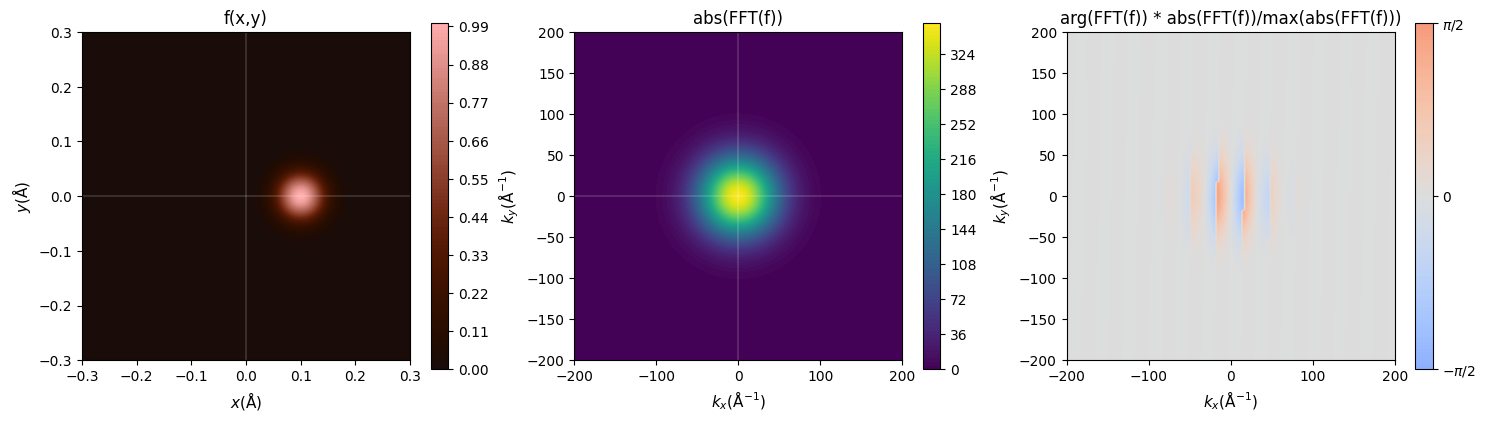

In [518]:
x0 = 0.1
y0 = 0.00

f = gaussian(X, Y, x0, y0, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

## Two objects displaced relative to each other
- plane-wave phases interfere and create a plane-wave modulation in amplitude

### Close to each other
- almost like an ellipsoid (in the limit when they are very close basically an ellipsoid in both the real and reciprocal space)

/tmp/ipykernel_1353791/3632906505.py:6: RuntimeWarning: invalid value encountered in divide
  F_phase = np.arctan(np.imag(F)/np.real(F))


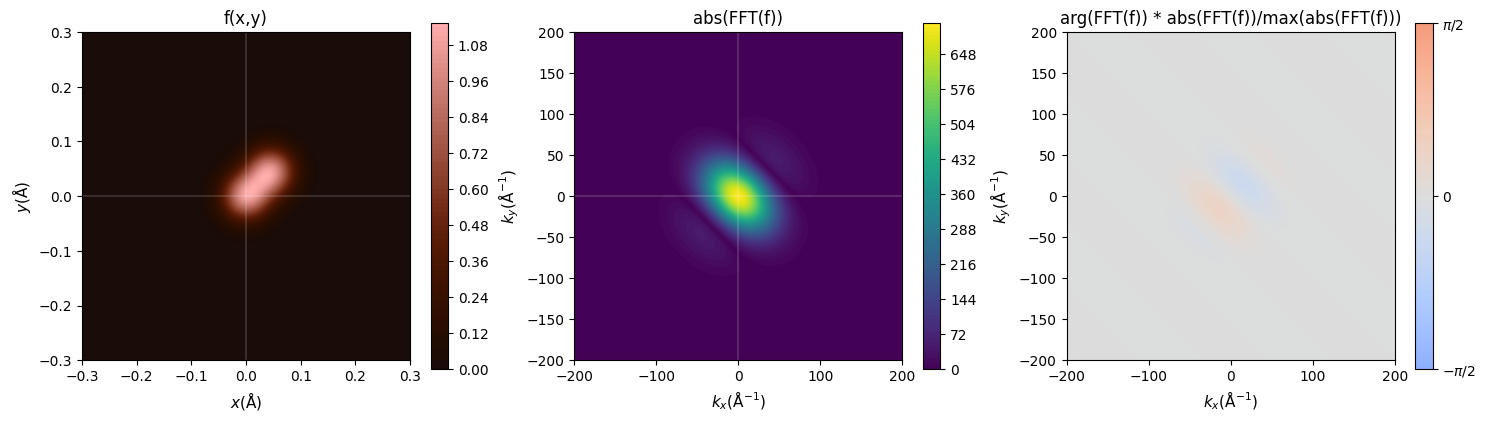

In [525]:
x0 = 0.045
y0 = 0.045

f = gaussian(X, Y, 0, 0, sigma) + gaussian(X, Y, x0, y0, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

### Far from each other

#### Both positive
- maxima at origin in FFT

/tmp/ipykernel_1353791/3632906505.py:6: RuntimeWarning: invalid value encountered in divide
  F_phase = np.arctan(np.imag(F)/np.real(F))


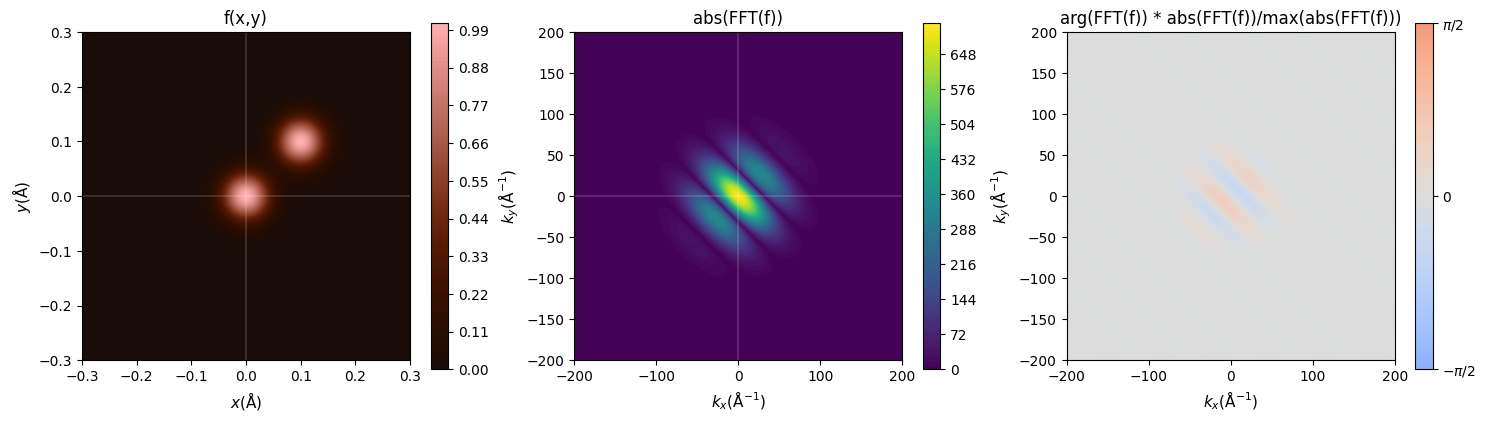

In [520]:
x0 = 0.1
y0 = 0.1

f = gaussian(X, Y, 0, 0, sigma) + gaussian(X, Y, x0, y0, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

#### Positive and negative
- minima at origin

/tmp/ipykernel_1353791/3632906505.py:6: RuntimeWarning: invalid value encountered in divide
  F_phase = np.arctan(np.imag(F)/np.real(F))


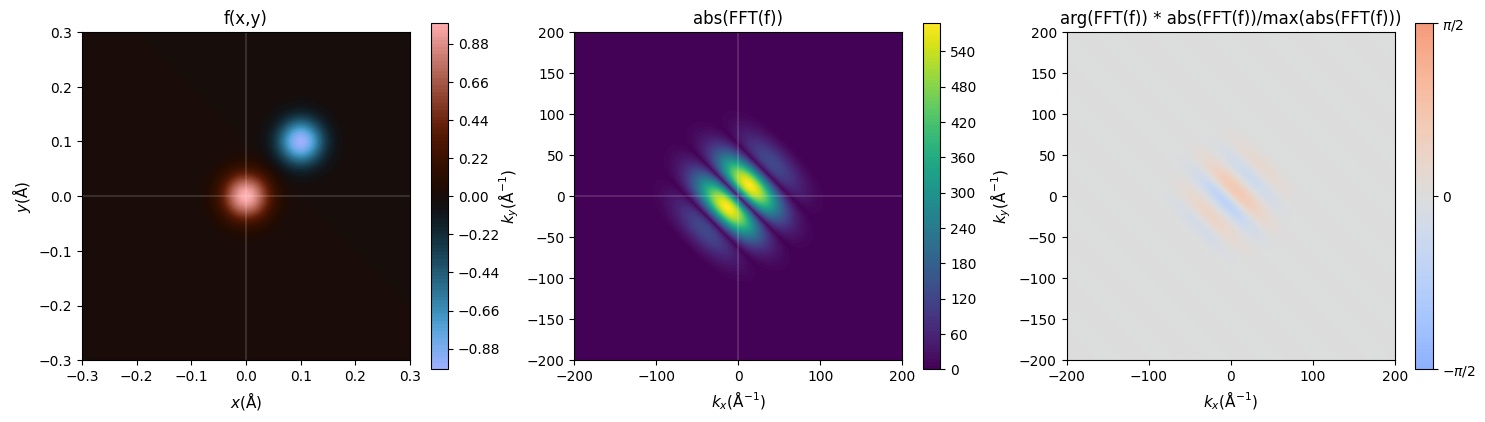

In [521]:
x0 = 0.1
y0 = 0.1

f = gaussian(X, Y, 0, 0, sigma) - gaussian(X, Y, x0, y0, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

#### Shifted globally
- global phase changes, their interference not

/tmp/ipykernel_1353791/3632906505.py:6: RuntimeWarning: invalid value encountered in divide
  F_phase = np.arctan(np.imag(F)/np.real(F))


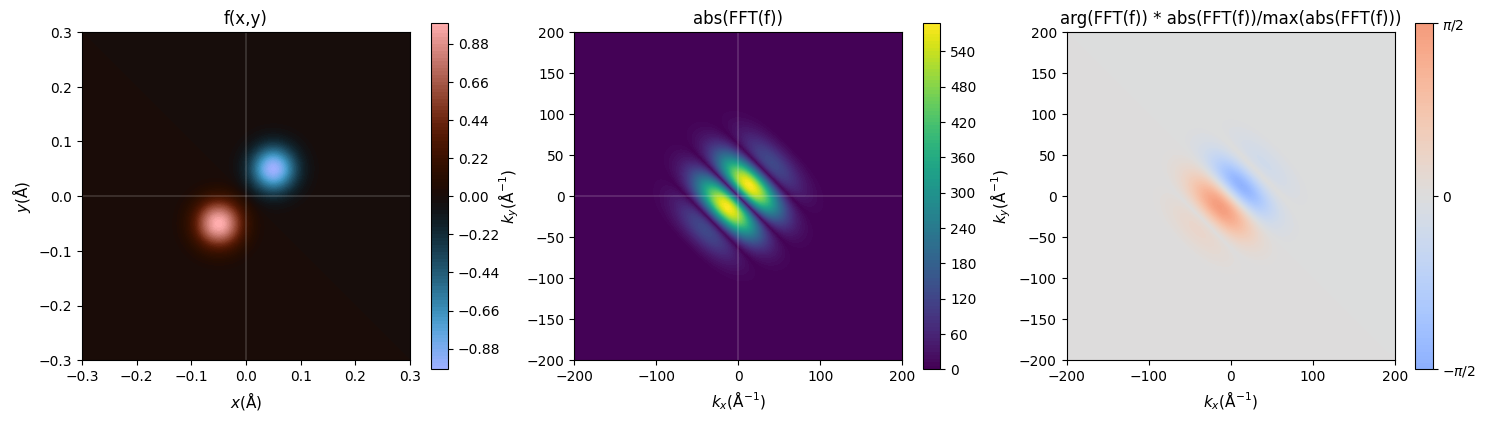

In [522]:
x0 = 0.1
y0 = 0.1

f = gaussian(X, Y, -x0/2, -y0/2, sigma) - gaussian(X, Y, x0/2, y0/2, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

#### Shifted globally further
- global phase changes, their interference not
    - half the period

/tmp/ipykernel_1353791/3632906505.py:6: RuntimeWarning: invalid value encountered in divide
  F_phase = np.arctan(np.imag(F)/np.real(F))


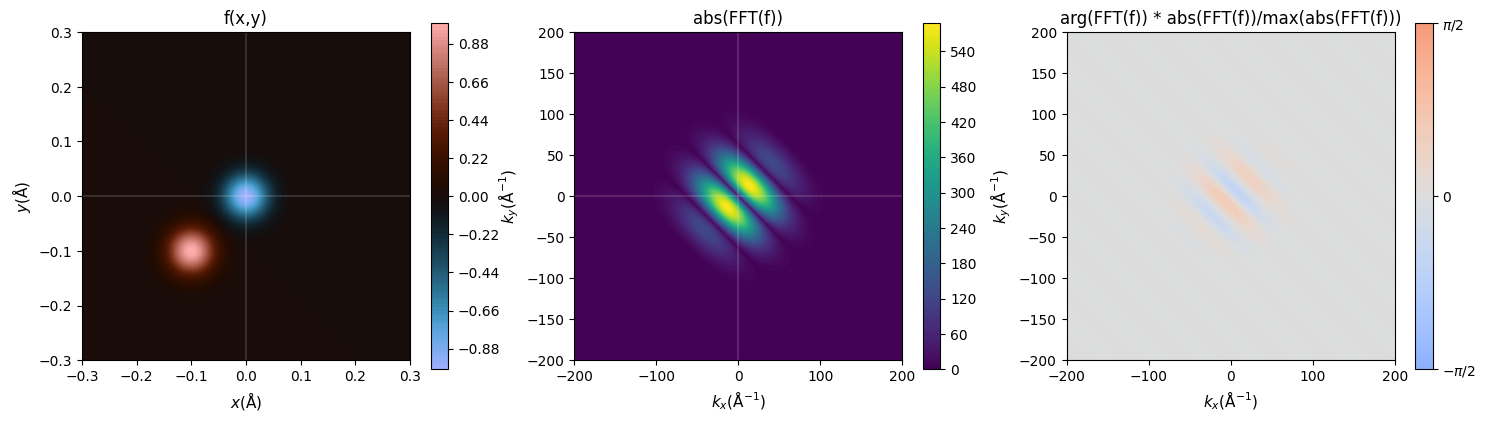

In [523]:
x0 = 0.1
y0 = 0.1

f = gaussian(X, Y, -x0, -y0, sigma) - gaussian(X, Y, 0, 0, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

#### Shifted globally even further
- global phase changes, their interference not
    - quarter the period

/tmp/ipykernel_1353791/3632906505.py:6: RuntimeWarning: invalid value encountered in divide
  F_phase = np.arctan(np.imag(F)/np.real(F))


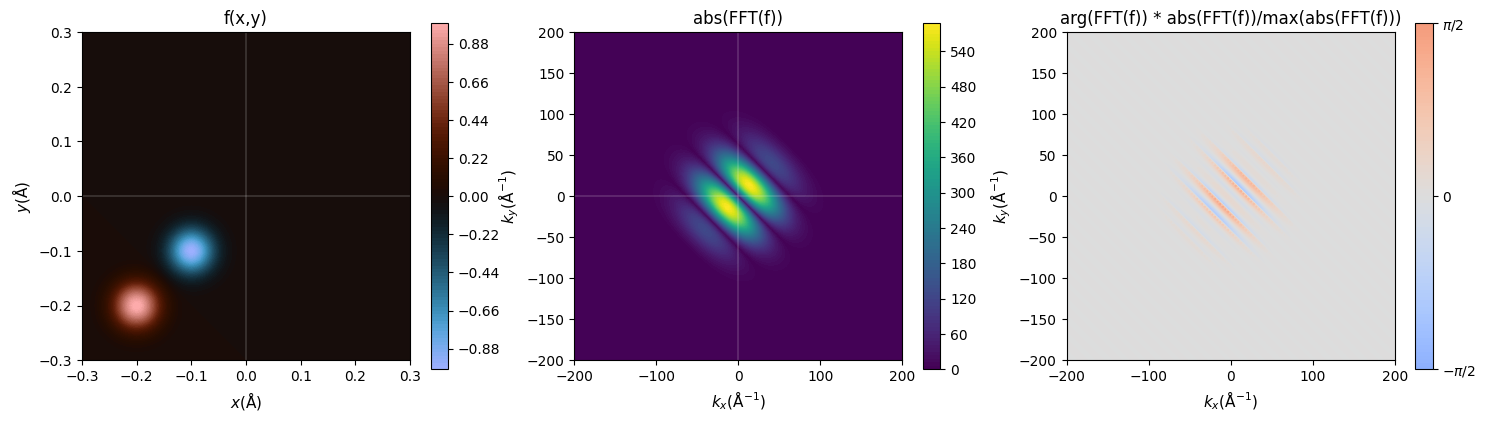

In [524]:
x0 = 0.1
y0 = 0.1

f = gaussian(X, Y, -2*x0, -2*y0, sigma) - gaussian(X, Y, -x0, -y0, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)